# CEE 690-02

# Environmental Spatial Data Analysis

# Lecture 10

# Logistics

* HW5 will be up by tomorrow morning. It is due next Thursday at the beginning of class.
* For the final project you will be turning in not just a report, but the entire code repository that created your results.

# Outline

* Finish up map projections (I forgot a few things)
* GDAL (Geospatial Data Abstraction Library)

# Parameters of a map projection

* **Ellipsoid** (e.g., WGS84)
* **Standard parallels/meridians** - Lines where the developable surface intersects with the ellipsoid (the closer you are to a standard parallel/meridian, the less distorsion your map will have)
    * A developable surface that is tangent to the sphere will have one standard parallel/meridian
    * A developable surface that is secant to the sphere will have two standard parallels/meridians (i.e., more constraints)
* **Central meridian** - Central longitude of the projection
* **Latitude of origin** - Central latitude of the projection
* (And more)


# PROJ

PROJ is a generic coordinate transformation software that transforms geospatial coordinates from one coordinate reference system (CRS) to another. This includes cartographic projections as well as geodetic transformations.

Source: https://proj.org/

In [1]:
%%html
<iframe width="939" height="528" src="https://en.wikibooks.org/wiki/PROJ.4" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

# EPSG Geodetic Parameter Registry

The EPSG Geodetic Parameter Dataset is a database of of global, regional, national, or local map projections. It helps us avoid defining all the parameters of a map projection.

In [3]:
%%html
<iframe width="939" height="528" src="https://spatialreference.org/ref/epsg/" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Let's look at some examples of projections and their EPSG and PROJ codes

#### Regular lat/lon grid (Plate Carree)
* EPSG:4326
* +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs 

#### CONUS Albers equal area
* EPSG:5070
* +proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 

# How do I choose a projection?

In [4]:
%%html
<iframe width="939" height="528" src="https://projectionwizard.org/" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

## You can also use XKCD to choose your projection

In [5]:
%%html
<iframe width="939" height="528" src="https://xkcd.com/977/" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# We are now ready for GDAL

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/GDALLogoColor.svg/2000px-GDALLogoColor.svg.png" width="500">

### GDAL stands for Geospatial Data Abstraction Library

GDAL is a C++ translator library for more than 200 raster and vector geospatial data formats. It is released under an X/MIT style Open Source license by the Open Source Geospatial Foundation. As a library, it presents a single raster abstract data model and single vector abstract data model to the calling application for all supported formats. It also comes with a variety of useful command line utilities for data translation and processing. It offers an API for a variety of languages such as C, C++, Python, Perl, C# and Java.

Source: https://www.osgeo.org/projects/gdal

Its core features include: 
    
* Reading and writing of raster and vector geospatial formats
* Data format translation
* Geospatial processing: subsetting, image warping, reprojection, mosaicing, tiling, DEM processing
* If all that you are using a GIS software package is for changing file formats, subsetting data, changing the spatial resolution, or reprojecting data, GDAL will let you accomplish all those tasks in a fraction of the time (and on any computing platform!)

# Which raster formats does GDAL support?

In [6]:
%%html
<iframe width="939" height="528" src="https://gdal.org/drivers/raster/index.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# What other software relies on GDAL?

In [7]:
%%html
<iframe width="939" height="528" src="https://gdal.org/software_using_gdal.html#software-using-gdal" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## What about rasterio?

It is just a wrapper around Python's GDAL library that makes interacting with raster data more straightforward and "Pythonic".

# To be clear, GDAL is amazing

# Thank you Frank Warmerdam!

<img src="https://avatars2.githubusercontent.com/u/14598047?s=460&v=4" width="500">


# So let's get started...

* The real power of GDAL is in the C++ library. However, we are going to be using primarily the command line (i.e., terminal) tools. 

* GDAL integrates the PROJ software library, making map projections straightforward from GDAL itself.

* Remember that we can access the terminal (via Bash) from another tab in Jupyter Lab or we can just include Bash code within our Jupyter notebook

* To ensure everyone can reproduce this lecture (and for your assignments) we will be using the Jupyter Notebook approach. 

# GDAL command line tools

In [8]:
%%html
<iframe width="939" height="528" src="https://gdal.org/programs/index.html#raster-programs" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Let's explore gdal command line tools using the data from HW#3

In [23]:
%matplotlib inline
import rasterio
import matplotlib.pyplot as plt
file = '/data/NED/dem_lat3536_lon-80-79.tif'

In [24]:
#Let's create a function that reads in the file and creates a map
import numpy as np
def create_figure(file):
    #Define a file pointer
    fp = rasterio.open(file)
    #Read in the data
    dem = fp.read(1)
    #Create the figure
    fig = plt.figure(figsize=(10,10))
    #ax = plt.axes(projection=crs)
    #Mask out the nodata value
    dem = np.ma.masked_array(dem,dem==fp.nodata)
    #Note that for simplicity I am just doing a plain imshow (you could use Carto)
    plt.imshow(dem,cmap=plt.get_cmap('terrain'))
    #Now lets add a colorbar
    cb = plt.colorbar(orientation='horizontal',shrink=0.75,pad=0.03)
    cb.ax.tick_params(labelsize=20)
    #Remove ticks
    plt.xticks([])
    plt.yticks([])
    #And a title
    plt.title('Elevation (m)',fontsize=25)
    #Close the file pointer
    fp.close()
    #Show the plot
    plt.show()

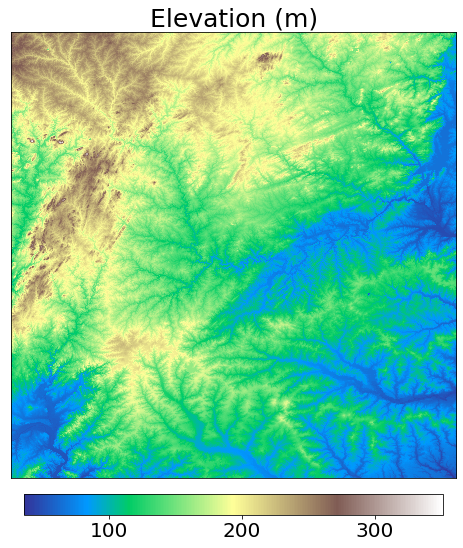

In [25]:
create_figure(file)

# gdalinfo

Purpose: Learning about our data

In [12]:
%%bash
gdalinfo /data/NED/dem_lat3536_lon-80-79.tif

Driver: GTiff/GeoTIFF
Files: /data/NED/dem_lat3536_lon-80-79.tif
Size is 3600, 3600
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-80.000000000000000,36.000000000000000)
Pixel Size = (0.000277777777778,-0.000277777777778)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -80.0000000,  36.0000000) ( 80d 0' 0.00"W, 36d 0' 0.00"N)
Lower Left  ( -80.0000000,  35.0000000) ( 80d 0' 0.00"W, 35d 0' 0.00"N)
Upper Right ( -79.0000000,  36.0000000) ( 79d 0' 0.00"W, 36d 0' 0.00"N)
Lower Right ( -79.0000000,  35.0000000) ( 79d 0' 0.00"W, 35d 0' 0.00"N)
Center      ( -79.5000000,  35.5000000) ( 79d30' 0.00"W, 35d30' 0.00"N)
Band 1 Block=3600x1 Type=Float32, ColorInterp=Gray
  NoData Value=-99999


pj_obj_create: Open of /opt/conda/share/proj failed


# gdalinfo

In [13]:
%%html
<iframe width="939" height="528" src="https://gdal.org/programs/gdalinfo.html#gdalinfo" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# More complex gdalinfo call

In [14]:
%%bash
gdalinfo -stats -proj4 /data/NED/dem_lat3536_lon-80-79.tif
#Let's remove the auxiliary file that was created
rm /data/NED/dem_lat3536_lon-80-79.tif.aux.xml

Driver: GTiff/GeoTIFF
Files: /data/NED/dem_lat3536_lon-80-79.tif
Size is 3600, 3600
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
PROJ.4 string is:
'+proj=longlat +datum=WGS84 +no_defs '
Origin = (-80.000000000000000,36.000000000000000)
Pixel Size = (0.000277777777778,-0.000277777777778)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -80.0000000,  36.0000000) ( 80d 0' 0.00"W, 36d 0' 0.00"N)
Lower Left  ( -80.0000000,  35.0000000) ( 80d 0' 0.00"W, 35d 0' 0.00"N)
Upper Right ( -79.0000000,  36.0000000) ( 79d 0' 0.00"W, 36d 0' 0.00"N)
Lower Right ( -79.0000000,  35.0000000) ( 79d 0' 0.00"W, 35d 0' 0.00"N)
Center      ( -79.5000000,  35.5000000) ( 79d30' 0.00"W, 35d30' 0.00"N)
Band 1 Block=3600x1 Ty

pj_obj_create: Open of /opt/conda/share/proj failed


# gdal_translate

Purpose: Convert between raster formats

In [15]:
%%bash
gdal_translate -of AAIGrid /data/NED/dem_lat3536_lon-80-79.tif ../Workspace/test.arcascii
#Use gdalinfo to see what it created
gdalinfo ../Workspace/test.arcascii

Input file size is 3600, 3600
0...10...20...30...40...50...60...70...80...90...100 - done.
Driver: AAIGrid/Arc/Info ASCII Grid
Files: ../Workspace/test.arcascii
       ../Workspace/test.arcascii.aux.xml
       ../Workspace/test.prj
Size is 3600, 3600
Coordinate System is:
GEOGCS["GCS_WGS_1984",
    DATUM["WGS_1984",
        SPHEROID["WGS_84",6378137,298.257223563]],
    PRIMEM["Greenwich",0],
    UNIT["Degree",0.017453292519943295]]
Origin = (-80.000000000000000,36.000000000800000)
Pixel Size = (0.000277777778000,-0.000277777778000)
Metadata:
  AREA_OR_POINT=Area
Corner Coordinates:
Upper Left  ( -80.0000000,  36.0000000) ( 80d 0' 0.00"W, 36d 0' 0.00"N)
Lower Left  ( -80.0000000,  35.0000000) ( 80d 0' 0.00"W, 35d 0' 0.00"N)
Upper Right ( -79.0000000,  36.0000000) ( 79d 0' 0.00"W, 36d 0' 0.00"N)
Lower Right ( -79.0000000,  35.0000000) ( 79d 0' 0.00"W, 35d 0' 0.00"N)
Center      ( -79.5000000,  35.5000000) ( 79d30' 0.00"W, 35d30' 0.00"N)
Band 1 Block=3600x1 Type=Float32, ColorInterp=Gray

pj_obj_create: Open of /opt/conda/share/proj failed


In [16]:
%%bash 
#Another example
gdal_translate -of NetCDF ../Workspace/test.arcascii ../Workspace/test.nc
#Use gdalinfo to see what it created
gdalinfo ../Workspace/test.nc

Input file size is 3600, 3600
0...10...20...30...40...50...60...70...80...90...100 - done.
Driver: netCDF/Network Common Data Format
Files: ../Workspace/test.nc
Size is 3600, 3600
Coordinate System is:
GEOGCS["GCS_WGS_1984",
    DATUM["WGS_1984",
        SPHEROID["WGS_84",6378137,298.257223563]],
    PRIMEM["Greenwich",0],
    UNIT["Degree",0.017453292519943295]]
Origin = (-80.000000000000000,36.000000000800000)
Pixel Size = (0.000277777778000,-0.000277777778000)
Metadata:
  Band1#grid_mapping=crs
  Band1#long_name=GDAL Band Number 1
  Band1#_FillValue=-99999
  crs#GeoTransform=-80 0.000277777778 0 36.0000000008 0 -0.000277777778 
  crs#grid_mapping_name=latitude_longitude
  crs#inverse_flattening=298.257223563
  crs#longitude_of_prime_meridian=0
  crs#long_name=CRS definition
  crs#semi_major_axis=6378137
  crs#spatial_ref=GEOGCS["GCS_WGS_1984",DATUM["WGS_1984",SPHEROID["WGS_84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]
  lat#long_name=latitude

pj_obj_create: Open of /opt/conda/share/proj failed


Let's see what that file looks like in netcdf

In [17]:
%%bash 
ncdump -h ../Workspace/test.nc

netcdf test {
dimensions:
	lon = 3600 ;
	lat = 3600 ;
variables:
	char crs ;
		crs:grid_mapping_name = "latitude_longitude" ;
		crs:long_name = "CRS definition" ;
		crs:longitude_of_prime_meridian = 0. ;
		crs:semi_major_axis = 6378137. ;
		crs:inverse_flattening = 298.257223563 ;
		crs:spatial_ref = "GEOGCS[\"GCS_WGS_1984\",DATUM[\"WGS_1984\",SPHEROID[\"WGS_84\",6378137,298.257223563]],PRIMEM[\"Greenwich\",0],UNIT[\"Degree\",0.017453292519943295]]" ;
		crs:GeoTransform = "-80 0.000277777778 0 36.0000000008 0 -0.000277777778 " ;
	double lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "latitude" ;
		lat:units = "degrees_north" ;
	double lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "longitude" ;
		lon:units = "degrees_east" ;
	float Band1(lat, lon) ;
		Band1:long_name = "GDAL Band Number 1" ;
		Band1:_FillValue = -99999.f ;
		Band1:grid_mapping = "crs" ;

// global attributes:
		:GDAL_AREA_OR_POINT = "Area" ;
		:Conventions = "CF-1.5" ;
		:GDAL = "GDAL

# gdal_translate

In [18]:
%%html
<iframe width="939" height="528" src="https://gdal.org/programs/gdal_translate.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# gdalwarp

Purpose: Image reprojection and warping utility

## Example 1: Change spatial resolution

In [19]:
%%bash 
gdalwarp -r average -overwrite -tr 0.1 0.1 /data/NED/dem_lat3536_lon-80-79.tif ../Workspace/test.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

Creating output file that is 10P x 10L.
Processing /data/NED/dem_lat3536_lon-80-79.tif [1/1] : 0Using internal nodata values (e.g. -99999) for image /data/NED/dem_lat3536_lon-80-79.tif.
Copying nodata values from source /data/NED/dem_lat3536_lon-80-79.tif to destination ../Workspace/test.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: ../Workspace/example.tif
Size is 1800, 1080
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-85.000000000000000,37.000000000000000)
Pixel Size = (0.002777777770000,-0.002777777770000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -85.0000000,  37.0000000) ( 85d 0' 0.00"W, 37d 0' 0.00"N)
Lower Left  ( -85.000000

pj_obj_create: Open of /opt/conda/share/proj failed


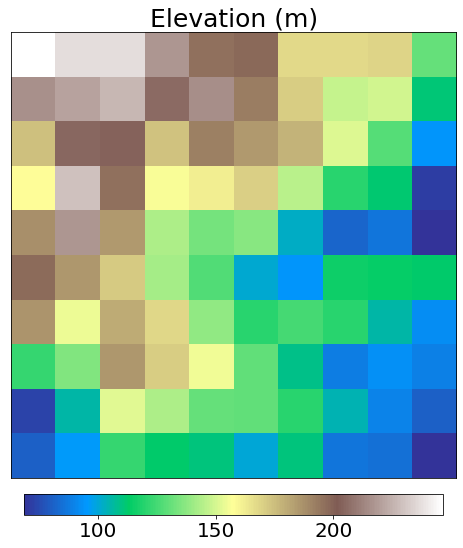

In [20]:
file = '../Workspace/test.tif'
#Create the figure
create_figure(file)

## Example 2: Subset the data

In [26]:
%%bash 
gdalwarp -overwrite -te -79.65 35.25 -79.35 35.55 /data/NED/dem_lat3536_lon-80-79.tif ../Workspace/test.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

Creating output file that is 1080P x 1080L.
Processing /data/NED/dem_lat3536_lon-80-79.tif [1/1] : 0Using internal nodata values (e.g. -99999) for image /data/NED/dem_lat3536_lon-80-79.tif.
Copying nodata values from source /data/NED/dem_lat3536_lon-80-79.tif to destination ../Workspace/test.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: ../Workspace/example.tif
Size is 1800, 1080
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-85.000000000000000,37.000000000000000)
Pixel Size = (0.002777777770000,-0.002777777770000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -85.0000000,  37.0000000) ( 85d 0' 0.00"W, 37d 0' 0.00"N)
Lower Left  ( -85.00

pj_obj_create: Open of /opt/conda/share/proj failed


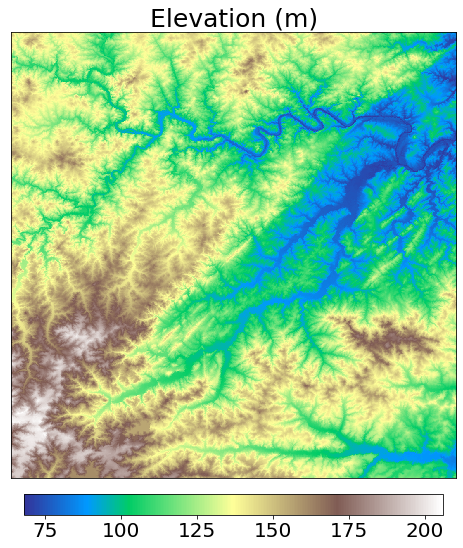

In [27]:
file = '../Workspace/test.tif'
#Create the figure
create_figure(file)

## Example 3: Reproject to Global Mollweide

In [28]:
%%bash 
#Mollweide projection
gdalwarp -r average -overwrite -t_srs '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs' /data/NED/dem_lat3536_lon-80-79.tif ../Workspace/example.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

Creating output file that is 6092P x 4883L.
Processing /data/NED/dem_lat3536_lon-80-79.tif [1/1] : 0Using internal nodata values (e.g. -99999) for image /data/NED/dem_lat3536_lon-80-79.tif.
Copying nodata values from source /data/NED/dem_lat3536_lon-80-79.tif to destination ../Workspace/example.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: ../Workspace/example.tif
Size is 6092, 4883
Coordinate System is:
PROJCS["Mollweide",
    GEOGCS["GCS_WGS_1984",
        DATUM["D_WGS_1984",
            SPHEROID["WGS_1984",6378137,298.257223563]],
        PRIMEM["Greenwich",0],
        UNIT["Degree",0.017453292519943295]],
    PROJECTION["Mollweide"],
    PARAMETER["central_meridian",0],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["Meter",1]]
Origin = (-7084709.557585393078625,4337579.950562796555459)
Pixel Size = (23.420031965749416,-23.420031965749416)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERL

pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed


In [ ]:
#Let's read that data back in to Python and make the plot we made before
file = '../Workspace/example.tif'
#Create the figure
create_figure(file)

And that is what a map projection distortion looks like! 

## Example 4: Reproject to local Mollweide

In [ ]:
%%bash 
#Mollweide projection
gdalwarp -r average -overwrite -t_srs '+proj=moll +lon_0=-79.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs' /data/NED/dem_lat3536_lon-80-79.tif ../Workspace/example.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

In [ ]:
#Let's read that data back in to Python and make the plot we made before
file = '../Workspace/example.tif'
#Create the figure
create_figure(file)

Localized projection? Distortion is minimized!

## Example 5: Reproject to a generalized albers conic equal area

In [ ]:
%%bash 
#Localized albers conic equal area
gdalwarp -r average -overwrite -t_srs '+proj=aea +lat_1=20 +lat_2=50 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=NAD83' /data/NED/dem_lat3536_lon-80-79.tif ../Workspace/example.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

In [ ]:
file = '../Workspace/example.tif'
#Create the figure
create_figure(file)

No one likes distortion!

## Example 6: Reproject to a localized albers conic equal area

In [ ]:
%%bash 
#Localized albers conic equal area
gdalwarp -r average -overwrite -t_srs '+proj=aea +lat_1=35 +lat_2=36 +lat_0=35.5 +lon_0=-79.5 +x_0=0 +y_0=0 +ellps=WGS84 +datum=NAD83' /data/NED/dem_lat3536_lon-80-79.tif ../Workspace/example.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

In [ ]:
file = '../Workspace/example.tif'
#Create the figure
create_figure(file)

# What can we actually do in gdalwarp?

In [ ]:
%%html
<iframe width="939" height="528" src="https://gdal.org/programs/gdalwarp.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### But how do we work with very large datasets that are split into tiles?

Let's look at the example of the US National Elevation Dataset (NED) at 1 arcsec resolution. 

<img src="https://prd-wret.s3-us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/styles/full_width/public/thumbnails/image/NED%2C%20US.gif" width="500">

This is actually the same database that you used in HW2 to parse files

In [ ]:
%%bash 
#Move to the directory
cd /data/NED
#List all the files
ls
#Count the number of files
ls -la | wc -l
#Determine the size of the folder
du -h ../NED


Let's say that I want to extract all the elevation data from NED at a 10 arcsec spatial resolution over a bounding box that encompasses the Appalachian mountains in North Carolina. What would you do?

# Virtual rasters

In [ ]:
%%html
<iframe width="939" height="528" src="https://gdal.org/drivers/raster/vrt.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Long story short, it is a text file that glues all the single tiles files together to make one "virtual" raster file.

I have already created a virtual raster for NED so let's use `gdalinfo` on it

In [ ]:
%%bash
gdalinfo /data/NED/NED.vrt

In other words, it is a file that allows us to interpret all the tiled files as a single one.

# Working with virtual rasters

Let's try our example of extracting elevation data over the Appalachian mountains in NC at a 10 arcsec (i.e., 0.00277777777 arcdegree) spatial resolution.

In [ ]:
%%bash 
#Extract the desired region (-te), define a new resolution (-tr), 
#define the resampling method (-r), and overwrite an exiting file (-overwrite)
gdalwarp -te -85 34 -80 37 -tr 0.00277777777 0.00277777777 -r near -overwrite /data/NED/NED.vrt ../Workspace/example.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

In [ ]:
#Let's read that file in and create a map
file = '../Workspace/example.tif'
#Create the figure
create_figure(file)

## Let's do some simply analysis with this data

In [ ]:
#Define a file pointer
fp = rasterio.open(file)
#Read in the data
dem = fp.read(1)
#Mask out the nodata value
dem = np.ma.masked_array(dem,dem==fp.nodata)
#Initialize figure
plt.figure(figsize=(10,6))
#Let's plot the histogram
plt.subplot(2,2,1)
plt.hist(dem.reshape(dem.size),density=1,bins=100)
plt.title('Elevation (m)',fontsize=20)
plt.xticks(fontsize=14,rotation=25)
plt.yticks(fontsize=14)
#Let's plot the elevation average from north to south
plt.subplot(2,2,2)
plt.title('Elevation average (N to S)',fontsize=20)
plt.plot(np.mean(dem,axis=1),lw=3)
plt.yticks(fontsize=14)
plt.xticks([])
#Let's plot the elevation average from west to east
plt.subplot(2,2,3)
plt.title('Elevation average (W to E)',fontsize=20)
plt.plot(np.mean(dem,axis=0),lw=3)
plt.yticks(fontsize=14)
plt.xticks([])
#Let's plot the diagonal of the data
plt.subplot(2,2,4)
plt.title('Diagonal of elevation (NW to SE)',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks([])
plt.plot(np.diag(dem))
#Close the file pointer
fp.close()
plt.tight_layout()
#Show the plot
plt.show()

* We just created a viable way to subset and work with a GB to TB dataset in a matter of minutes

* Any ideas of how we could then work with the entire dataset (while still keeping things tractable)?

* Divide and conquer - Divide a large task (analyze the US) into smaller tasks (analyze 1/100 of the US).
* Iterate per region and perform calculations
* If available use High Performance Computing (HPC) and distribute the tasks to 100 cores. 
* But never read in 240 GB into memory. First because you can't, but even if you could it would be a waste. 

We will introduce HPC briefly at the end of the course if we have time (which we probably won't).

# Use GDAL

* GDAL should be your go-to from now on when you need to subset, reproject, upscale, or reformat a 2D raster dataset.
* It gives you inmense flexibility
* And more importantly, it will save you hours upon hours of work. 

There is much more to learn about GDAL. Here are some resources:
* https://github.com/dwtkns/gdal-cheat-sheet
* https://medium.com/planet-stories/a-gentle-introduction-to-gdal-part-1-a3253eb96082
* https://gdal.org/

# But what about 3D+ data? 

* GDAL is actually terrible when working with a time dimension.
* On Tuesday I will cover the CDO (climate data operators) software package. 
* CDO is the go-to when working regularly gridded time-varying data. 
* Key: GDAL still wins with 2D data.